<a href="https://colab.research.google.com/github/Chris-Congleton/MSc-Thesis/blob/main/Playground/Testset_2021_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [150]:
!pip install -U gensim
!pip install pyLDAvis

import json, os
import pandas as pd
import nltk
import glob
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
nltk.download('punkt')

# regular expression library
import re
# wordcloud library
from wordcloud import WordCloud

import gensim
from gensim.utils import simple_preprocess
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('dutch')

import gensim.corpora as corpora

import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading and cleaning data

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!dir gdrive/MyDrive/CS/Thesis/Testset_2021/

HetParool_2021.json  NRC_2021.json  Telegraaf_2021.json  Trouw_2021.json


In [4]:
path_NRC = 'gdrive/MyDrive/CS/Thesis/Testset_2021/NRC_2021.json'
path_Trouw = 'gdrive/MyDrive/CS/Thesis/Testset_2021/Trouw_2021.json'
path_HetParool = 'gdrive/MyDrive/CS/Thesis/Testset_2021/HetParool_2021.json'
path_Telegraaf = 'gdrive/MyDrive/CS/Thesis/Testset_2021/Telegraaf_2021.json'

In [5]:
df_NRC = pd.read_json(path_NRC)
df_Trouw = pd.read_json(path_Trouw)
df_HetParool = pd.read_json(path_HetParool)
df_Telegraaf = pd.read_json(path_Telegraaf)

In [11]:
df_NRC["Bron"] = "NRC"
df_Trouw["Bron"] = "Trouw"
df_HetParool["Bron"] = "HetParool"
df_Telegraaf["Bron"] = "Telegraaf"

In [17]:
df_NRC.isna().sum()

url                3
timestamp       2174
title             21
publisherID     8878
cleantext          3
category       34341
Bron               0
dtype: int64

In [18]:
df_Trouw.isna().sum()

url               0
timestamp      2308
title             0
publisherID    2445
cleantext         0
category        242
Bron              0
dtype: int64

In [19]:
df_HetParool.isna().sum()

url               1
timestamp      3256
title             1
publisherID    3693
cleantext         1
category        474
Bron              0
dtype: int64

In [25]:
df_Telegraaf.shape

(143876, 7)

In [26]:
df_Telegraaf.head()

,url,timestamp,title,publisherID,cleantext,category,Bron
0,https://www.telegraaf.nl/sport/366918834/micha...,NaT,Michael Smith gooit titelverdediger Gerwyn Pri...,onze Telesportredactie,NaN,Darts,Telegraaf
1,https://www.telegraaf.nl/images/300x200/filter...,NaT,None,None,NaN,None,Telegraaf
2,https://www.telegraaf.nl/nieuws/731353708/twee...,NaT,Twee doden en meerdere gewonden bij Duitse vuu...,None,NaN,Buitenland,Telegraaf
3,https://www.telegraaf.nl/images/300x200/filter...,NaT,None,None,NaN,None,Telegraaf
4,https://www.telegraaf.nl/nieuws/451924999/rech...,NaT,Rechter moet zich na conflict in ’horrorflat’ ...,Connie Vertegaal,NaN,Binnenland,Telegraaf


In [20]:
df_Telegraaf.isna().sum()

url                62
timestamp      143876
title           76831
publisherID    109987
cleantext      143876
category        71968
Bron                0
dtype: int64

## Concat data

In [27]:
dfs = [df_NRC, df_Trouw, df_HetParool]
df = pd.concat(dfs, ignore_index=True)

df.head()

,url,timestamp,title,publisherID,cleantext,category,Bron
0,https://www.nrc.nl/nieuws/2021/01/31/een-herha...,2021-01-31 20:18:43,Een herhaling van vorig seizoen is zo goed als...,Fabian van der Poll,De eerste maand van 2021 is uitstekend verlope...,None,NRC
1,https://www.nrc.nl/nieuws/2021/01/31/avondklok...,2021-01-31 20:02:10,‘Avondklok waarschijnlijk niet verlengd als be...,Steven Musch,De avondklok wordt waarschijnlijk niet verleng...,None,NRC
2,https://www.nrc.nl/nieuws/2021/01/31/school-op...,2021-01-31 19:58:21,"School open? Dan testen, ventilatie en mondkapjes",Karel Berkhout,Door de heropening van de scholen loopt het aa...,None,NRC
3,https://www.nrc.nl/nieuws/2021/01/31/scholen-o...,2021-01-31 19:45:18,"De basisscholen gaan open, met een paar nieuwe...",Claudia Kammer,"Het werd alom verwacht, en zondag aan het ei...",None,NRC
4,https://www.nrc.nl/nieuws/2021/01/31/arrestati...,2021-01-31 19:43:49,Arrestatie Russische betoger,None,,None,NRC


## Remove missing text

In [28]:
df.isna().sum()

url                4
timestamp       7738
title             22
publisherID    15016
cleantext          4
category       35057
Bron               0
dtype: int64

In [29]:
df = df[df['cleantext'].notna()]

In [30]:
df.isna().sum()


url                0
timestamp       7734
title             18
publisherID    15012
cleantext          0
category       35053
Bron               0
dtype: int64

In [32]:
df.shape

(68597, 7)

In [45]:
df_NRC.head()

,url,timestamp,title,publisherID,cleantext,category,Bron
0,https://www.nrc.nl/nieuws/2021/01/31/een-herha...,2021-01-31 20:18:43,Een herhaling van vorig seizoen is zo goed als...,Fabian van der Poll,De eerste maand van 2021 is uitstekend verlope...,None,NRC
1,https://www.nrc.nl/nieuws/2021/01/31/avondklok...,2021-01-31 20:02:10,‘Avondklok waarschijnlijk niet verlengd als be...,Steven Musch,De avondklok wordt waarschijnlijk niet verleng...,None,NRC
2,https://www.nrc.nl/nieuws/2021/01/31/school-op...,2021-01-31 19:58:21,"School open? Dan testen, ventilatie en mondkapjes",Karel Berkhout,Door de heropening van de scholen loopt het aa...,None,NRC
3,https://www.nrc.nl/nieuws/2021/01/31/scholen-o...,2021-01-31 19:45:18,"De basisscholen gaan open, met een paar nieuwe...",Claudia Kammer,"Het werd alom verwacht, en zondag aan het ei...",None,NRC
4,https://www.nrc.nl/nieuws/2021/01/31/arrestati...,2021-01-31 19:43:49,Arrestatie Russische betoger,None,,None,NRC


# Coverage Bias

In [168]:
zetelverdeling = {'Party': ['VVD','CDA','D66','PvdA',
                            'PVV','GL','SP','SGP','BBB',
                            'Volt','CU','FVD','BIJ1',
                            '50PLUS','PvdD','JA21',],
                   'Zetel': [34, 15, 24, 9, 17, 8,
                              9, 3, 1, 3, 5, 8, 1, 
                              1, 6, 3,]}
df_zetels = pd.DataFrame(data=zetelverdeling).sort_values('Zetel', ascending=False)

df_zetels.head()

,Party,Zetel
0,VVD,34
2,D66,24
4,PVV,17
1,CDA,15
3,PvdA,9


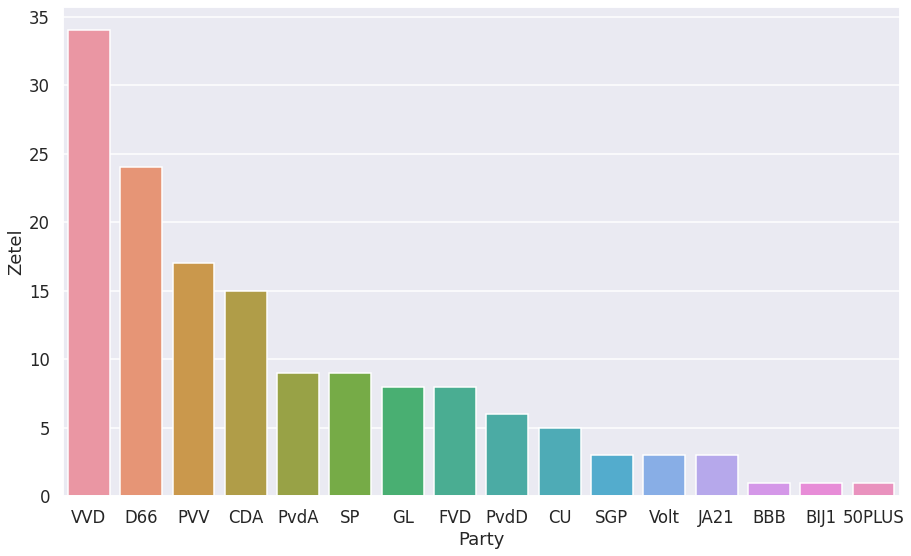

In [169]:
sns.barplot(data=df_zetels, x='Party', y='Zetel')

In [57]:
df.head()

,url,timestamp,title,publisherID,cleantext,category,Bron
0,https://www.nrc.nl/nieuws/2021/01/31/een-herha...,2021-01-31 20:18:43,Een herhaling van vorig seizoen is zo goed als...,Fabian van der Poll,De eerste maand van 2021 is uitstekend verlope...,None,NRC
1,https://www.nrc.nl/nieuws/2021/01/31/avondklok...,2021-01-31 20:02:10,‘Avondklok waarschijnlijk niet verlengd als be...,Steven Musch,De avondklok wordt waarschijnlijk niet verleng...,None,NRC
2,https://www.nrc.nl/nieuws/2021/01/31/school-op...,2021-01-31 19:58:21,"School open? Dan testen, ventilatie en mondkapjes",Karel Berkhout,Door de heropening van de scholen loopt het aa...,None,NRC
3,https://www.nrc.nl/nieuws/2021/01/31/scholen-o...,2021-01-31 19:45:18,"De basisscholen gaan open, met een paar nieuwe...",Claudia Kammer,"Het werd alom verwacht, en zondag aan het ei...",None,NRC
4,https://www.nrc.nl/nieuws/2021/01/31/arrestati...,2021-01-31 19:43:49,Arrestatie Russische betoger,None,,None,NRC


In [159]:
def visualise_term_mention(frame, words, normalisation=True):
  df = frame.copy(deep=True)

  for w in words.keys():
    df[w] = 0
    for term in words[w]:
      df[w] += df.cleantext.str.count(term)

  df_word_counts = pd.DataFrame()

  for w in words:
    df_word_counts[w] = df.groupby("Bron")[w].agg("sum")

  df_word_counts = df_word_counts.reset_index()
  df_word_mentions = df_word_counts.melt("Bron")

  df_word_mentions = df_word_mentions.rename(columns={'variable':'Word','value':'Frequency'})

  if normalisation:
    df_norm = df_word_mentions.groupby('Bron').sum('Frequency').reset_index().rename(columns={'Frequency':'Total Freq'})
    df_word_mentions = df_word_mentions.merge(df_norm, on='Bron')
    df_word_mentions['Normalised_Freq'] = df_word_mentions['Frequency']/df_word_mentions['Total Freq']

  mentions = df_word_mentions.pivot("Word", "Bron", "Normalised_Freq")

  # bigger plot elements suitable for giving talks
  sns.set_context("talk")
  # set figure size
  plt.figure(figsize=(15,9))
  # Time series plot with Seaborn lineplot()
  sns.heatmap(mentions)
  # axis labels
  plt.legend(title="Newspaper Normalised Frequency")

In [160]:
partijen_termen = {'VVD':['VVD', 'Volkspartij voor Vrijheid en Democratie',],
                   'CDA':['CDA', 'Christen-Democratisch Appèl'],
                   'D66':['D66', 'Democraten 66', "D'66"],
                   'PvdA':['PvdA','PVDA', 'Partij van de Arbeid'],
                   'PVV':['PVV', 'Partij voor de Vrijheid'],
                   'GL':['GL', 'GroenLinks'],
                   'SP':['SP', 'Socialistische Partij'],
                   'SGP':['SGP', 'Staatkundig Gereformeerde Partij'],
                   'BBB':['BBB', 'Boeren Burger Beweging'],
                   'Volt':['Volt'],
                   'CU':['CU', 'Christen Unie'],
                   'FVD': ['FVD', 'Forum Voor Democratie'],
                   'BIJ1':['BIJ1'],
                   '50PLUS':['50PLUS'],
                   'PvdD':['PvdD','Partij voor de Dieren'],
                   'JA21':['JA21']}

No handles with labels found to put in legend.


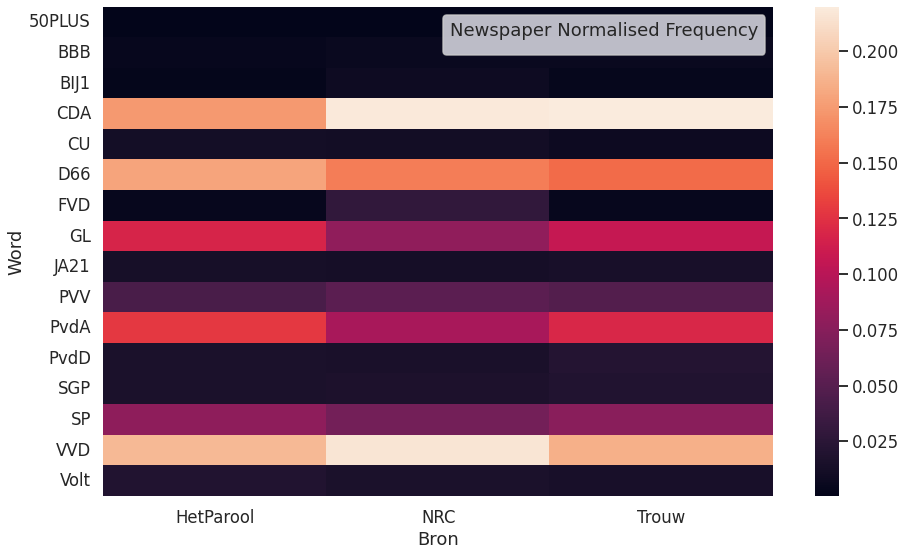

In [161]:
visualise_term_mention(df, partijen_termen)

In [162]:
politici_termen = {'Rutte':['Rutte'],
                   'Hoekstra':['Hoekstra'],
                   'Kaag':['Kaag'],
                   'Marijnissen':['Marijnissen'],
                   'Wilders':['Wilders'],
                   'Klaver':['Klaver'],
                   'Ploumen':['Ploumen'],
                   'Staaij':['Staaij'],
                   'Plas':['Plas'],
                   'Dassen':['Dassen'],
                   'Segers':['Segers'],
                   'Baudet': ['Baudet'],
                   'Simons':['Simons'],
                   'Den Haan':['Den Haan'],
                   'Ouwehand':['Ouwehand'],
                   'Eerdmans':['Eerdmans']}

No handles with labels found to put in legend.


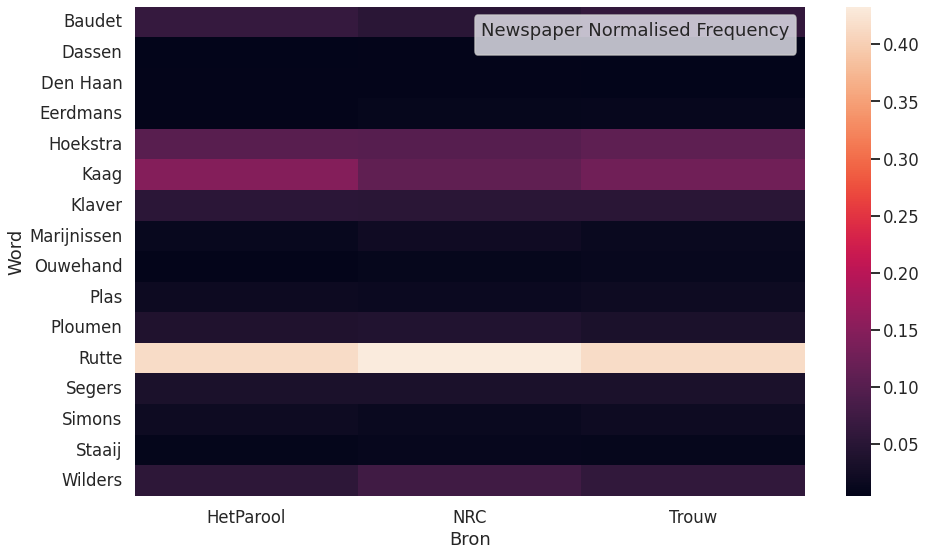

In [163]:
visualise_term_mention(df, politici_termen)

# LDA

In [35]:
# Remove the columns
articles = df.drop(columns=['url', 'publisherID', 'category',], axis=1)# Print out the first rows of papers
articles.head()

,timestamp,title,cleantext,Bron
0,2021-01-31 20:18:43,Een herhaling van vorig seizoen is zo goed als...,De eerste maand van 2021 is uitstekend verlope...,NRC
1,2021-01-31 20:02:10,‘Avondklok waarschijnlijk niet verlengd als be...,De avondklok wordt waarschijnlijk niet verleng...,NRC
2,2021-01-31 19:58:21,"School open? Dan testen, ventilatie en mondkapjes",Door de heropening van de scholen loopt het aa...,NRC
3,2021-01-31 19:45:18,"De basisscholen gaan open, met een paar nieuwe...","Het werd alom verwacht, en zondag aan het ei...",NRC
4,2021-01-31 19:43:49,Arrestatie Russische betoger,,NRC


In [34]:
articles.size

274388

In [36]:
# Remove punctuation
articles['cleantext_processed'] = articles['cleantext'].map(lambda x: re.sub('[,\\.!?]', '', x))
# Save D66
articles['cleantext_processed'] = articles['cleantext_processed'].map(lambda x: re.sub('D66', 'dzeszes', x))
# Save BIJ1
articles['cleantext_processed'] = articles['cleantext_processed'].map(lambda x: re.sub('BIJ1', 'bijeen', x))
# Save 50PLUS
articles['cleantext_processed'] = articles['cleantext_processed'].map(lambda x: re.sub('50PLUS', 'vijfplus', x))
# Save JA21
articles['cleantext_processed'] = articles['cleantext_processed'].map(lambda x: re.sub('JA21', 'jatweeeen', x))
# Convert the titles to lowercase
articles['cleantext_processed'] = articles['cleantext_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
articles['cleantext_processed'].head()

0    de eerste maand van 2021 is uitstekend verlope...
1    de avondklok wordt waarschijnlijk niet verleng...
2    door de heropening van de scholen loopt het aa...
3      het werd alom verwacht en zondag aan het ein...
4                                                     
Name: cleantext_processed, dtype: object

In [37]:
stop_words.extend(['nbsp', 'rsquo', 'lsquo','euml', 'rdquo', 'quot', 'ldquo' ])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = articles.cleantext_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['eerste', 'maand', 'uitstekend', 'verlopen', 'nadat', 'veld', 'alkmaar', 'even', 'vuisten', 'gebald', 'zit', 'erik', 'ten', 'hag', 'alweer', 'koel', 'achter', 'microfoon', 'superjanuari', 'gesproken', 'zegt', 'trainer', 'ajax', 'staat', 'superfebruari', 'deur', 'weer', 'blik', 'vooruit', 'ten']


In [38]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 10), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 11), (22, 1), (23, 4), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


In [39]:
# number of topics
num_topics = 7
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
doc_lda = lda_model[corpus]

In [40]:
def terms_topics_frame(terms):

  df = pd.DataFrame(data=None)

  for t in terms:
    df_t_topics = pd.DataFrame(lda_model.get_term_topics(t, minimum_probability=0.000000001))
    df_t_topics = df_t_topics.drop(columns=0)
    df_t_topics = df_t_topics.rename(columns={1:t})
    df = pd.concat([df, df_t_topics], axis=1)
  
  return df


In [41]:
df_tt = terms_topics_frame(['pvv', 'groenlinks', 'pvda', 'sp',
                            'dzeszes', 'vvd', 'sgp',
                            'bbb', 'volt', 'cu', 'cda',
                            'fvd', 'bijeen', 'vijfplus', 'pvdd',
                            'jatweeeen']
)
df_tt['topic'] = df_tt.index
df_tt.head()

,pvv,groenlinks,pvda,sp,dzeszes,vvd,sgp,bbb,volt,cu,cda,fvd,bijeen,vijfplus,pvdd,jatweeeen,topic
0,5.350083e-04,1.545048e-03,1.944745e-03,8.501534e-04,2.760884e-03,2.986805e-03,2.525789e-04,0.000059,1.735110e-04,2.321237e-04,2.492584e-03,3.300483e-04,0.000108,0.000002,4.866244e-05,1.999333e-04,0
1,1.134897e-06,8.214344e-07,1.221967e-06,6.242612e-06,3.015536e-06,4.199382e-06,9.303142e-08,0.000015,4.594981e-05,1.305527e-07,7.064085e-06,3.830630e-07,0.000055,0.000002,1.916663e-05,2.245306e-07,1
2,2.290431e-06,4.280129e-08,1.189592e-07,2.099953e-07,5.745858e-07,3.554482e-06,1.056632e-07,NaN,2.767372e-08,2.516037e-05,7.030314e-06,1.378559e-05,0.000124,NaN,1.627134e-08,1.183514e-05,2
3,1.321943e-04,7.160293e-05,1.160726e-04,1.759220e-04,3.648742e-04,2.915534e-04,3.401439e-05,NaN,3.349067e-06,4.448508e-08,5.927408e-04,7.046480e-05,0.000120,NaN,NaN,1.607901e-08,3
4,3.781410e-08,2.034043e-08,4.526929e-08,1.642494e-08,6.778495e-08,1.427292e-07,5.481169e-08,NaN,3.438037e-07,2.774287e-07,7.057736e-08,2.157531e-08,0.000017,NaN,NaN,NaN,4


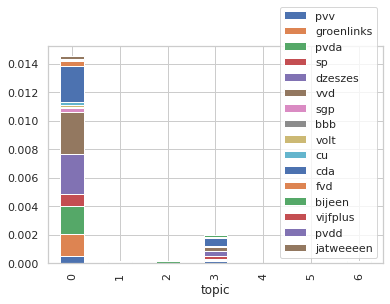

In [42]:
sns.set_theme(style="whitegrid")

# Plot the topic dist per term
df_tt.set_index('topic').plot(kind='bar', stacked=True)
sns.set(rc={'figure.figsize':(15,9)})

In [43]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis = gensimvis.prepare(lda_model, corpus, id2word)

LDAvis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.120960 -0.049391       1        1  26.319974
4     -0.154624  0.055064       2        1  17.366795
0     -0.055526 -0.021321       3        1  15.891118
6      0.084231 -0.014100       4        1  15.501616
3      0.114217 -0.121632       5        1  11.188387
1      0.028948 -0.009840       6        1   9.132954
2      0.103715  0.161220       7        1   4.599156, topic_info=           Term          Freq          Total Category  logprob  loglift
634      mensen  76787.000000   76787.000000  Default  30.0000  30.0000
479     procent  29332.000000   29332.000000  Default  29.0000  29.0000
992   president   9465.000000    9465.000000  Default  28.0000  28.0000
13         ajax  10270.000000   10270.000000  Default  27.0000  27.0000
1185    volgens  41951.000000   41951.000000  Default  26.0000  26.0000
...         ...           ...            ...      ...      ...      ...
227       staat   1768.309887   30116.605697   Topic7  -6.0316   0.2442
527          we   1906.995359  139597.058228   Topic7  -5.9561  -1.2139
896        twee   1668.071126   44832.216506   Topic7  -6.0900  -0.2120
538   afgelopen   1536.452549   23391.385236   Topic7  -6.1722   0.3564
726      werden   1524.959372   18640.084611   Topic7  -6.1797   0.5760

[731 rows x 6 columns], token_table=        Topic      Freq      Term
term                             
7036        2  0.024969  aandelen
7036        3  0.005202  aandelen
7036        4  0.963389  aandelen
7036        5  0.001040  aandelen
7036        6  0.004162  aandelen
...       ...       ...       ...
2774        2  0.000832      zout
2774        3  0.021628      zout
2774        4  0.007487      zout
2774        5  0.002496      zout
127525      1  0.993446    zwanen

[2747 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 1, 7, 4, 2, 3])